# Internal analysis: Italian Gang

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import networkx.algorithms.community as nx_comm
from tabulate import tabulate
from matplotlib.cm import get_cmap
from matplotlib.patches import Patch

## Dataset import

In [2]:
df = pd.read_csv("../datasets/italian_CSV/ITALIAN_GANGS.csv", index_col=0)


G = nx.from_pandas_adjacency(df)

print(f"Nodes: {G.number_of_nodes()}, Edges: {G.number_of_edges()}")

num_nodes= G.number_of_nodes()
num_edges = G.number_of_edges()

Nodes: 67, Edges: 114


In [3]:
attr = pd.read_csv("../datasets/italian_CSV/ITALIAN_GANGS_ATTR.csv", index_col=0)
country_map = attr["country"].to_dict()
nx.set_node_attributes(G, country_map, name="country")

### Graph visualization

In [4]:
def plot_graph(G, title=''):
    # collect countries for nodes (fallback to 'Unknown' if missing)
    node_countries = [G.nodes[n].get("country", "Unknown") for n in G.nodes()]
    unique_countries = sorted(set(node_countries), key=lambda x: (str(x)))

    # Build a categorical colormap with as many distinct colors as needed
    cmap = get_cmap('tab20', max(2, len(unique_countries)))  # tab20 gives many distinct colors
    color_for_country = {c: cmap(i) for i, c in enumerate(unique_countries)}
    node_colors = [color_for_country[c] for c in node_countries]

    # Layout
    pos = nx.spring_layout(G, k=0.5, iterations=50, seed=42)

    plt.figure(figsize=(12, 10))
    nx.draw(
        G, pos,
        with_labels=True,
        node_size=600,
        font_size=12,
        node_color=node_colors,
        edge_color="#999999"
    )
    plt.title(title)

    # Legend (one patch per country)
    legend_handles = [Patch(facecolor=color_for_country[c], label=f"Country {c}") for c in unique_countries]
    plt.legend(handles=legend_handles, title="Country", loc="best", frameon=True, fontsize=16, title_fontsize=16)

    plt.tight_layout()
    plt.show()

/var/folders/rw/ryhws39n0tn4_x5b_sm8y_dh0000gn/T/ipykernel_4506/4028322798.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('tab20', max(2, len(unique_countries)))  # tab20 gives many distinct colors
/var/folders/rw/ryhws39n0tn4_x5b_sm8y_dh0000gn/T/ipykernel_4506/4028322798.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


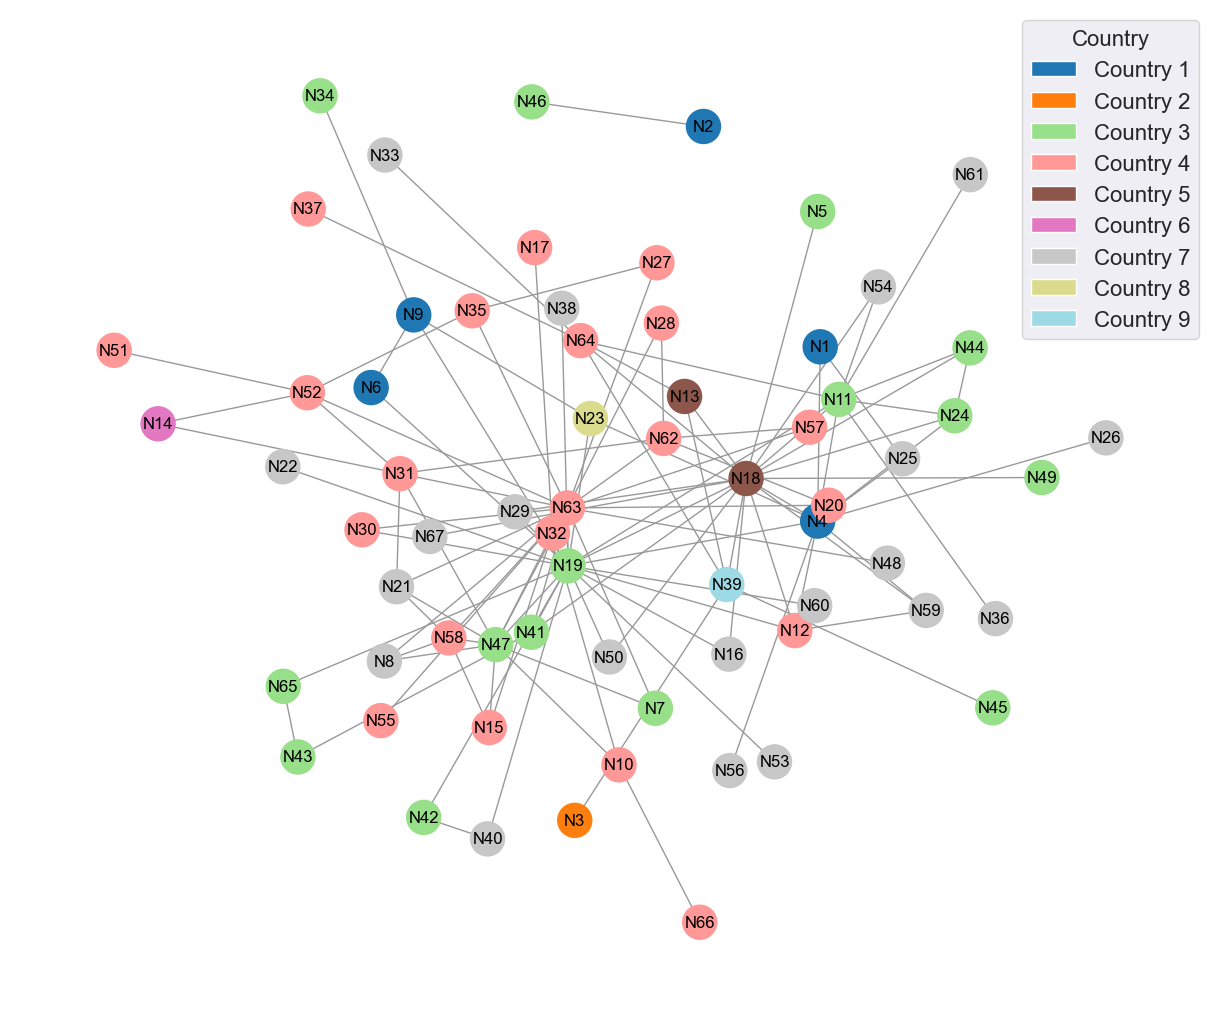

In [5]:
plot_graph(G)

## Within-network analysis (internal analysis of the gangs)

### A. General structural metrics
- **Density**
  - **What it is:** Ratio between existing ties and all possible ties.
  - **Why useful:** Measures cohesion; high density → easier communication and lower vulnerability to central node removal.

In [6]:
density = nx.density(G)
print(f"Density: {density:.4f}")

Density: 0.0516


- **Average degree**
  - **What it is:** Average number of connections per node.
  - **Why useful:** Indicates member activity and level of engagement.

In [7]:
if num_nodes > 0:
    avg_degree = (2 * num_edges) / num_nodes
    print(f"Average Degree: {avg_degree:.4f}")

Average Degree: 3.4030


- **Network diameter and average path length**
  - **What it is:** Maximum/average length of paths between nodes.
  - **Why useful:** Measures the network's efficiency in transmitting information or orders.

In [8]:
G_largest = G.copy()

if nx.is_connected(G):
    print("The network is connected")

else:
    print("The network is not connected")

    components = list(nx.connected_components(G))
    largest_component = max(components, key=len)
    G_largest = G.subgraph(largest_component).copy()

    print(f"Info: Calculating over the largest connected component ({G_largest.number_of_nodes()} nodes).")

diameter = nx.diameter(G_largest)
print(f"Diameter: {diameter}")

avg_path_length = nx.average_shortest_path_length(G_largest)
print(f"Average shortest path length: {avg_path_length:.4f}")


The network is not connected
Info: Calculating over the largest connected component (65 nodes).
Diameter: 6
Average shortest path length: 3.0120


- **Clustering coefficient**
  - **What it is:** Probability that a node's neighbors are connected to each other.
  - **Why useful:** Highlights closed subgroups or internal "cells"; useful for understanding resilience and community str

In [9]:
avg_clustering_coefficient = nx.average_clustering(G)
print(f"Average clustering coefficient: {avg_clustering_coefficient:.4f}")

Average clustering coefficient: 0.4347


- **Modularity**
  - **What it is:** Measure of the presence of well-defined internal communities.
  - **Why useful:** Reveals internal divisions and possible subgroups or "cliques".

In [10]:
communities_partition = nx_comm.greedy_modularity_communities(G)

modularity_score = nx_comm.modularity(G, communities_partition)

print(f"Number of Communities: {len(communities_partition)}")
print(f"Modularity score: {modularity_score:.4f}")

Number of Communities: 5
Modularity score: 0.5561


### B. Centrality metrics
- **Degree centrality**
  - **What it is:** Number of direct connections a node has.
  - **Why useful:** Identifies the most active or influential members.

In [11]:
degree_cent = nx.degree_centrality(G)
print(f"Degree Centrality: {degree_cent}")

Degree Centrality: {'N1': 0.030303030303030304, 'N2': 0.015151515151515152, 'N3': 0.015151515151515152, 'N4': 0.16666666666666669, 'N5': 0.015151515151515152, 'N6': 0.030303030303030304, 'N7': 0.030303030303030304, 'N8': 0.045454545454545456, 'N9': 0.06060606060606061, 'N10': 0.045454545454545456, 'N11': 0.13636363636363635, 'N12': 0.06060606060606061, 'N13': 0.045454545454545456, 'N14': 0.030303030303030304, 'N15': 0.045454545454545456, 'N16': 0.030303030303030304, 'N17': 0.015151515151515152, 'N18': 0.2727272727272727, 'N19': 0.3181818181818182, 'N20': 0.030303030303030304, 'N21': 0.06060606060606061, 'N22': 0.015151515151515152, 'N23': 0.045454545454545456, 'N24': 0.06060606060606061, 'N25': 0.030303030303030304, 'N26': 0.015151515151515152, 'N27': 0.030303030303030304, 'N28': 0.030303030303030304, 'N29': 0.030303030303030304, 'N30': 0.030303030303030304, 'N31': 0.09090909090909091, 'N32': 0.07575757575757576, 'N33': 0.015151515151515152, 'N34': 0.015151515151515152, 'N35': 0.045454

In [12]:
dict(sorted(degree_cent.items(), key=lambda x: x[1],reverse=True))

{'N19': 0.3181818181818182,
 'N63': 0.2878787878787879,
 'N18': 0.2727272727272727,
 'N4': 0.16666666666666669,
 'N47': 0.15151515151515152,
 'N11': 0.13636363636363635,
 'N31': 0.09090909090909091,
 'N64': 0.09090909090909091,
 'N32': 0.07575757575757576,
 'N39': 0.07575757575757576,
 'N52': 0.07575757575757576,
 'N58': 0.07575757575757576,
 'N62': 0.07575757575757576,
 'N9': 0.06060606060606061,
 'N12': 0.06060606060606061,
 'N21': 0.06060606060606061,
 'N24': 0.06060606060606061,
 'N41': 0.06060606060606061,
 'N8': 0.045454545454545456,
 'N10': 0.045454545454545456,
 'N13': 0.045454545454545456,
 'N15': 0.045454545454545456,
 'N23': 0.045454545454545456,
 'N35': 0.045454545454545456,
 'N44': 0.045454545454545456,
 'N59': 0.045454545454545456,
 'N1': 0.030303030303030304,
 'N6': 0.030303030303030304,
 'N7': 0.030303030303030304,
 'N14': 0.030303030303030304,
 'N16': 0.030303030303030304,
 'N20': 0.030303030303030304,
 'N25': 0.030303030303030304,
 'N27': 0.030303030303030304,
 'N28':

- **Betweenness centrality**
  - **What it is:** Number of times a node lies on the shortest paths between other nodes.
  - **Why useful:** Highlights brokers or gatekeepers; nodes critical for the flow of information.


In [13]:
between_cent = nx.betweenness_centrality(G)
print(f"Betweenness Centrality: {between_cent}")

Betweenness Centrality: {'N1': 0.0, 'N2': 0.0, 'N3': 0.0, 'N4': 0.1307593416684326, 'N5': 0.0, 'N6': 0.0, 'N7': 0.0, 'N8': 0.0, 'N9': 0.029603729603729603, 'N10': 0.02937062937062937, 'N11': 0.10674330719785265, 'N12': 0.004750300204845658, 'N13': 0.0, 'N14': 0.0, 'N15': 0.0003108003108003108, 'N16': 0.0, 'N17': 0.0, 'N18': 0.2881588613406795, 'N19': 0.5557822985095713, 'N20': 0.0, 'N21': 0.0002719502719502719, 'N22': 0.0, 'N23': 0.002797202797202797, 'N24': 0.0008702408702408701, 'N25': 0.0, 'N26': 0.0, 'N27': 0.0, 'N28': 0.0, 'N29': 0.0, 'N30': 0.0, 'N31': 0.021770502225047686, 'N32': 0.03727272727272727, 'N33': 0.0, 'N34': 0.0, 'N35': 0.0006216006216006216, 'N36': 0.0, 'N37': 0.0, 'N38': 0.0, 'N39': 0.05827505827505827, 'N40': 0.0, 'N41': 0.07060464787737515, 'N42': 0.0, 'N43': 0.0002331002331002331, 'N44': 0.0, 'N45': 0.0, 'N46': 0.0, 'N47': 0.13958607049516134, 'N48': 0.0, 'N49': 0.0, 'N50': 0.0, 'N51': 0.0, 'N52': 0.039418308963763526, 'N53': 0.0, 'N54': 0.0, 'N55': 0.0, 'N56': 0

In [14]:
dict(sorted(between_cent.items(), key=lambda x: x[1],reverse=True))

{'N19': 0.5557822985095713,
 'N63': 0.3633043723952815,
 'N18': 0.2881588613406795,
 'N47': 0.13958607049516134,
 'N4': 0.1307593416684326,
 'N11': 0.10674330719785265,
 'N41': 0.07060464787737515,
 'N64': 0.061072261072261075,
 'N39': 0.05827505827505827,
 'N52': 0.039418308963763526,
 'N32': 0.03727272727272727,
 'N9': 0.029603729603729603,
 'N10': 0.02937062937062937,
 'N31': 0.021770502225047686,
 'N65': 0.005066045066045064,
 'N12': 0.004750300204845658,
 'N23': 0.002797202797202797,
 'N58': 0.002540792540792541,
 'N62': 0.0018648018648018646,
 'N24': 0.0008702408702408701,
 'N35': 0.0006216006216006216,
 'N15': 0.0003108003108003108,
 'N21': 0.0002719502719502719,
 'N43': 0.0002331002331002331,
 'N1': 0.0,
 'N2': 0.0,
 'N3': 0.0,
 'N5': 0.0,
 'N6': 0.0,
 'N7': 0.0,
 'N8': 0.0,
 'N13': 0.0,
 'N14': 0.0,
 'N16': 0.0,
 'N17': 0.0,
 'N20': 0.0,
 'N22': 0.0,
 'N25': 0.0,
 'N26': 0.0,
 'N27': 0.0,
 'N28': 0.0,
 'N29': 0.0,
 'N30': 0.0,
 'N33': 0.0,
 'N34': 0.0,
 'N36': 0.0,
 'N37': 0.0

- **Closeness centrality**
  - **What it is:** Reciprocal of the sum of a node's distances to all other nodes.
  - **Why useful:** A node close to all others can quickly spread information or orders.

In [15]:
closeness_cent = nx.closeness_centrality(G)
print(f"Closeness Centrality: {closeness_cent}")

Closeness Centrality: {'N1': 0.2955266955266956, 'N2': 0.015151515151515152, 'N3': 0.2443330947267955, 'N4': 0.41932841932841936, 'N5': 0.3118623420130958, 'N6': 0.3526170798898072, 'N7': 0.3199000312402374, 'N8': 0.32155754435547185, 'N9': 0.35667014977359807, 'N10': 0.30421865715983365, 'N11': 0.41932841932841936, 'N12': 0.395290484462459, 'N13': 0.32155754435547185, 'N14': 0.25024437927663734, 'N15': 0.30273466371027347, 'N16': 0.3807399144822458, 'N17': 0.24627224627224625, 'N18': 0.4563279857397505, 'N19': 0.5396574440052702, 'N20': 0.3150284571604368, 'N21': 0.32492463906076474, 'N22': 0.3486550902281239, 'N23': 0.3672225210686749, 'N24': 0.3283629950296617, 'N25': 0.2955266955266956, 'N26': 0.2941260950739624, 'N27': 0.3150284571604368, 'N28': 0.3150284571604368, 'N29': 0.3807399144822458, 'N30': 0.39031827711072997, 'N31': 0.3301096067053514, 'N32': 0.3283629950296617, 'N33': 0.24725341060002415, 'N34': 0.26185909730213525, 'N35': 0.3199000312402374, 'N36': 0.2941260950739624, 

In [16]:
dict(sorted(closeness_cent.items(), key=lambda x: x[1],reverse=True))

{'N19': 0.5396574440052702,
 'N63': 0.4597081930415264,
 'N18': 0.4563279857397505,
 'N41': 0.4370465215535638,
 'N47': 0.42800417972831767,
 'N4': 0.41932841932841936,
 'N11': 0.41932841932841936,
 'N12': 0.395290484462459,
 'N30': 0.39031827711072997,
 'N16': 0.3807399144822458,
 'N29': 0.3807399144822458,
 'N50': 0.3807399144822458,
 'N23': 0.3672225210686749,
 'N9': 0.35667014977359807,
 'N6': 0.3526170798898072,
 'N65': 0.3526170798898072,
 'N40': 0.3506248929977744,
 'N42': 0.3506248929977744,
 'N22': 0.3486550902281239,
 'N38': 0.3486550902281239,
 'N53': 0.3486550902281239,
 'N60': 0.3486550902281239,
 'N31': 0.3301096067053514,
 'N64': 0.3301096067053514,
 'N24': 0.3283629950296617,
 'N32': 0.3283629950296617,
 'N21': 0.32492463906076474,
 'N39': 0.32492463906076474,
 'N58': 0.32492463906076474,
 'N52': 0.3232323232323232,
 'N59': 0.3232323232323232,
 'N8': 0.32155754435547185,
 'N13': 0.32155754435547185,
 'N62': 0.32155754435547185,
 'N7': 0.3199000312402374,
 'N35': 0.31990

- **Eigenvector centrality / PageRank**
  - **What it is:** Importance based on being connected to other important nodes.
  - **Why useful:** Highlights leaders recognized by the most influential members.

In [17]:
eigen_cent = nx.eigenvector_centrality(G, max_iter=1000)
print(f"Eigenvector Centrality: {eigen_cent}")

Eigenvector Centrality: {'N1': 0.04496990485672573, 'N2': 1.6770741983038417e-30, 'N3': 0.013215638487871311, 'N4': 0.26133039654069345, 'N5': 0.055560861993774635, 'N6': 0.07850189071220404, 'N7': 0.07763227857857569, 'N8': 0.09487576517255128, 'N9': 0.09525405276495283, 'N10': 0.04706488752045944, 'N11': 0.23754522860726568, 'N12': 0.17602995672955532, 'N13': 0.08663131462192727, 'N14': 0.029792794763496454, 'N15': 0.06329381861859204, 'N16': 0.12007780439591466, 'N17': 0.014080517429240507, 'N18': 0.3784376910692109, 'N19': 0.43943617980958827, 'N20': 0.058832187992082695, 'N21': 0.11299887488177773, 'N22': 0.06451694240214002, 'N23': 0.11686948938568367, 'N24': 0.14521152113807745, 'N25': 0.04496990485672573, 'N26': 0.038367598673479636, 'N27': 0.0552714915128156, 'N28': 0.058832187992082695, 'N29': 0.12007780439591466, 'N30': 0.11017940638533978, 'N31': 0.1234365489155551, 'N32': 0.09590259924974665, 'N33': 0.017854814140281325, 'N34': 0.013984948310064017, 'N35': 0.06544716439924

In [18]:
dict(sorted(eigen_cent.items(), key=lambda x: x[1],reverse=True))

{'N19': 0.43943617980958827,
 'N18': 0.3784376910692109,
 'N63': 0.3110091474601773,
 'N4': 0.26133039654069345,
 'N11': 0.23754522860726568,
 'N47': 0.21774792719067354,
 'N12': 0.17602995672955532,
 'N41': 0.1709271841884021,
 'N24': 0.14521152113807745,
 'N31': 0.1234365489155551,
 'N64': 0.12161360690162783,
 'N16': 0.12007780439591466,
 'N29': 0.12007780439591466,
 'N50': 0.12007780439591466,
 'N59': 0.11977258150646403,
 'N58': 0.11744553391449174,
 'N23': 0.11686948938568367,
 'N21': 0.11299887488177773,
 'N44': 0.11175576900153954,
 'N30': 0.11017940638533978,
 'N32': 0.09590259924974665,
 'N9': 0.09525405276495283,
 'N8': 0.09487576517255128,
 'N54': 0.09043638509207151,
 'N39': 0.09001505166690564,
 'N62': 0.08969899162650245,
 'N13': 0.08663131462192727,
 'N52': 0.0794822058460328,
 'N6': 0.07850189071220404,
 'N7': 0.07763227857857569,
 'N40': 0.07561915631876111,
 'N42': 0.07561915631876111,
 'N65': 0.0697038582114277,
 'N35': 0.06544716439924353,
 'N22': 0.064516942402140

- **Centrality results**

In [19]:
df_centrality = pd.DataFrame({
    'degree': degree_cent,
    'betweenness': between_cent,
    'closeness': closeness_cent,
    'eigenvector': eigen_cent
})
df_centrality.index.name = 'Node'

print("\n--- Top 5 Nodes per Degree Centrality (Popularity) ---")
print(df_centrality.sort_values(by='degree', ascending=False).head().to_markdown(floatfmt=".4f"))

print("\n--- Top 5 Nodes per Betweenness Centrality (Broker) ---")
print(df_centrality.sort_values(by='betweenness', ascending=False).head().to_markdown(floatfmt=".4f"))

print("\n--- Top 5 Nodes per Closeness Centrality (Efficiency) ---")
print(df_centrality.sort_values(by='closeness', ascending=False).head().to_markdown(floatfmt=".4f"))

print("\n--- Top 5 Nodes per Eigenvector Centrality (Influence) ---")
print(df_centrality.sort_values(by='eigenvector', ascending=False).head().to_markdown(floatfmt=".4f"))


--- Top 5 Nodes per Degree Centrality (Popularity) ---
| Node   |   degree |   betweenness |   closeness |   eigenvector |
|:-------|---------:|--------------:|------------:|--------------:|
| N19    |   0.3182 |        0.5558 |      0.5397 |        0.4394 |
| N63    |   0.2879 |        0.3633 |      0.4597 |        0.3110 |
| N18    |   0.2727 |        0.2882 |      0.4563 |        0.3784 |
| N4     |   0.1667 |        0.1308 |      0.4193 |        0.2613 |
| N47    |   0.1515 |        0.1396 |      0.4280 |        0.2177 |

--- Top 5 Nodes per Betweenness Centrality (Broker) ---
| Node   |   degree |   betweenness |   closeness |   eigenvector |
|:-------|---------:|--------------:|------------:|--------------:|
| N19    |   0.3182 |        0.5558 |      0.5397 |        0.4394 |
| N63    |   0.2879 |        0.3633 |      0.4597 |        0.3110 |
| N18    |   0.2727 |        0.2882 |      0.4563 |        0.3784 |
| N47    |   0.1515 |        0.1396 |      0.4280 |        0.2177 |
| N

### C. Roles and vulnerability
- **Identification of key roles (leader, broker, peripheral members)**
  - **Metrics:** Combination of centrality, degree, betweenness, and clustering.
  - **Why useful:** Identifies who leads, who mediates between subgroups, and who remains peripheral.


In [20]:
high_thresh = 0.95
low_thresh = 0.05

degree_high_thresh = df_centrality['degree'].quantile(high_thresh)
eigen_high_thresh = df_centrality['eigenvector'].quantile(high_thresh)
between_high_thresh = df_centrality['betweenness'].quantile(high_thresh)
degree_low_thresh = df_centrality['degree'].quantile(low_thresh)

leaders = df_centrality[
    (df_centrality['degree'] >= degree_high_thresh) &
    (df_centrality['eigenvector'] >= eigen_high_thresh)
]

brokers = df_centrality[
    (df_centrality['betweenness'] >= between_high_thresh)
]

peripherals = df_centrality[
    (df_centrality['degree'] <= degree_low_thresh)
]

print(f"\n--- Leader (Degree >= {degree_high_thresh:.4f} & Eigenvector >= {eigen_high_thresh:.4f}) ---")
print(leaders.sort_values(by='degree', ascending=False).to_markdown(floatfmt=".4f"))

print(f"\n--- Broker (Betweenness >= {between_high_thresh:.4f}) ---")
print(brokers.sort_values(by='betweenness', ascending=False).to_markdown(floatfmt=".4f"))

print(f"\n--- Peripheral (Degree <= {degree_low_thresh:.4f}) ---")
print(peripherals.sort_values(by='degree', ascending=True).to_markdown(floatfmt=".4f"))


--- Leader (Degree >= 0.1621 & Eigenvector >= 0.2542) ---
| Node   |   degree |   betweenness |   closeness |   eigenvector |
|:-------|---------:|--------------:|------------:|--------------:|
| N19    |   0.3182 |        0.5558 |      0.5397 |        0.4394 |
| N63    |   0.2879 |        0.3633 |      0.4597 |        0.3110 |
| N18    |   0.2727 |        0.2882 |      0.4563 |        0.3784 |
| N4     |   0.1667 |        0.1308 |      0.4193 |        0.2613 |

--- Broker (Betweenness >= 0.1369) ---
| Node   |   degree |   betweenness |   closeness |   eigenvector |
|:-------|---------:|--------------:|------------:|--------------:|
| N19    |   0.3182 |        0.5558 |      0.5397 |        0.4394 |
| N63    |   0.2879 |        0.3633 |      0.4597 |        0.3110 |
| N18    |   0.2727 |        0.2882 |      0.4563 |        0.3784 |
| N47    |   0.1515 |        0.1396 |      0.4280 |        0.2177 |

--- Peripheral (Degree <= 0.0152) ---
| Node   |   degree |   betweenness |   closen

- **K-core / core-periphery structure**
  - **What it is:** Identifies the central core versus the periphery.
  - **Why useful:** Highlights implicit hierarchy and concentration of power.


In [21]:
# Il k-core è un sottografo dove ogni nodo ha almeno grado 'k'

core_numbers = nx.core_number(G)

# main core della rete.
max_k = max(core_numbers.values())

print(f"The 'main core' of the network has k = {max_k}")

# Filtriamo per trovare i nodi che appartengono a questo core
main_core_nodes = [node for node, k in core_numbers.items() if k == max_k]

print(f"There are {len(main_core_nodes)} nodes (of {G.number_of_nodes()}) in the main core.")
print(f"Nodes in the 'Core' (k={max_k}): {main_core_nodes}")

The 'main core' of the network has k = 3
There are 20 nodes (of 67) in the main core.
Nodes in the 'Core' (k=3): ['N4', 'N8', 'N11', 'N12', 'N13', 'N15', 'N18', 'N19', 'N21', 'N24', 'N31', 'N32', 'N39', 'N41', 'N44', 'N47', 'N58', 'N59', 'N63', 'N64']


- **Cohesion / network robustness**
  - **Metrics:** Density, average path length, k-core decomposition.
  - **Why useful:** Vulnerability testing: impact of removing central nodes.

 Nodes (Largest Component): 24 (out of 64 remaining)
 Number of components: 18 

After removel the average shortest path length is 3.1341
After removel the density of the network is: 0.1014

 Removal Impact
	- Node Reduction: 64.18%
	- Increase in Average Path: 4.05%

Network after removal of key nodes


/var/folders/rw/ryhws39n0tn4_x5b_sm8y_dh0000gn/T/ipykernel_4506/4028322798.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('tab20', max(2, len(unique_countries)))  # tab20 gives many distinct colors
/var/folders/rw/ryhws39n0tn4_x5b_sm8y_dh0000gn/T/ipykernel_4506/4028322798.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


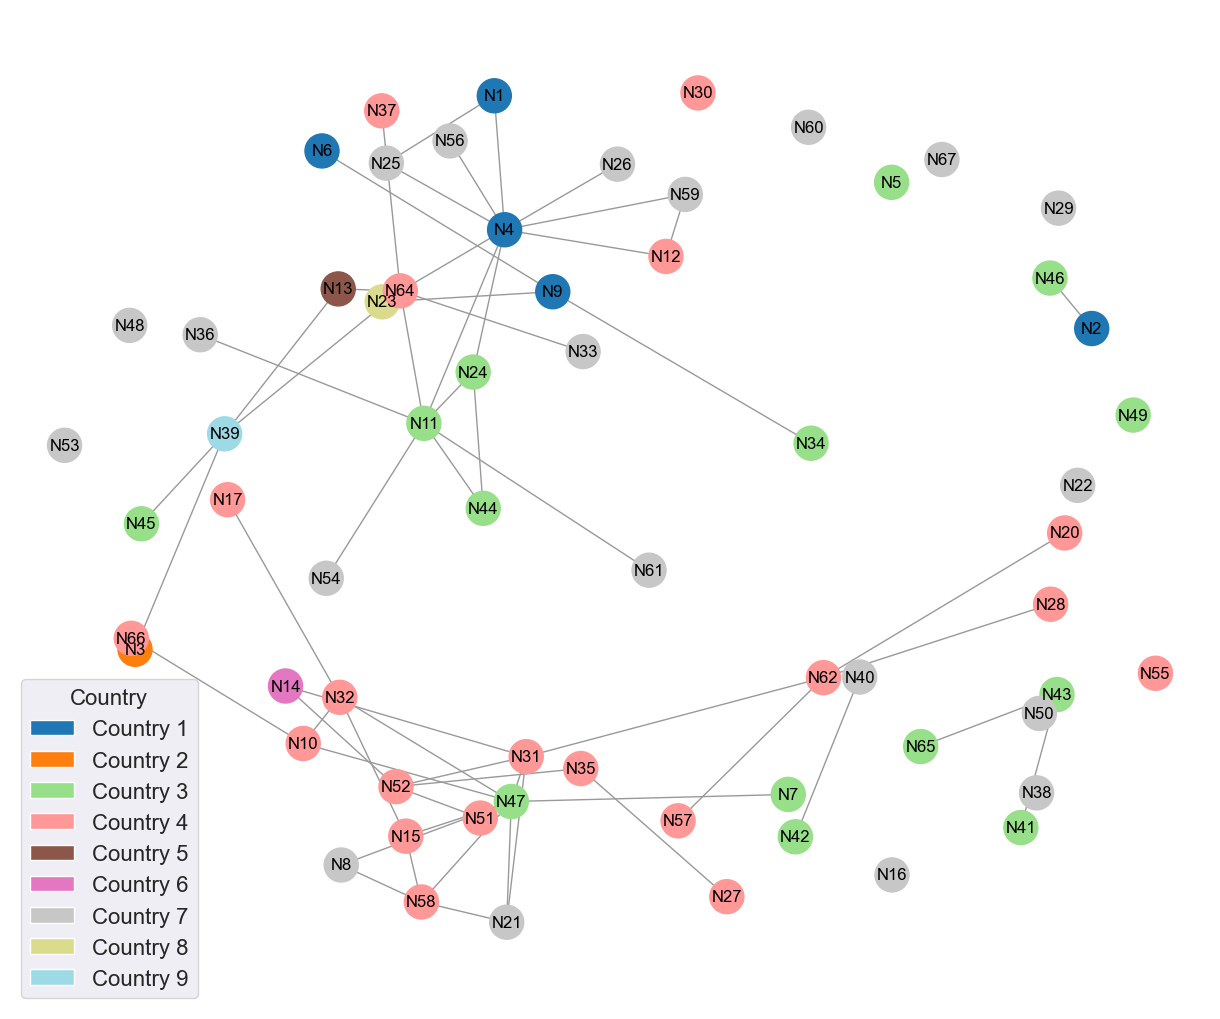

In [22]:
# Rimozione dei leader principali
nodes_to_remove = ['N19','N63', 'N18']

G_vulnerable = G.copy()
G_vulnerable.remove_nodes_from(nodes_to_remove)
G_largest_vuln = G_vulnerable.copy()

components_vuln = list(nx.connected_components(G_vulnerable))
largest_component_vuln = max(components_vuln, key=len)
G_largest_vuln = G_vulnerable.subgraph(largest_component_vuln).copy()
num_nodes_vuln = G_largest_vuln.number_of_nodes()
print(f" Nodes (Largest Component): {num_nodes_vuln} (out of {G_vulnerable.number_of_nodes()} remaining)")
print(f" Number of components: {len(components_vuln)} \n")

new_avg_path_length = nx.average_shortest_path_length(G_largest_vuln)
new_density = nx.density(G_largest_vuln)
print(f"After removel the average shortest path length is {new_avg_path_length:.4f}")
print(f"After removel the density of the network is: {new_density:.4f}")

print("\n Removal Impact")
nodes_lost_pct = (num_nodes - num_nodes_vuln) / num_nodes
print(f"\t- Node Reduction: {nodes_lost_pct:.2%}")

path_increase_pct = (new_avg_path_length - avg_path_length) / avg_path_length
print(f"\t- Increase in Average Path: {path_increase_pct:.2%}")

print("\nNetwork after removal of key nodes")
plot_graph(G_vulnerable)

# Ethnicity Analysis

In [23]:
import seaborn as sns
import numpy as np
from networkx.algorithms import community

## Load data and build network

In [34]:
df = pd.read_csv("../datasets/italian_CSV/ITALIAN_GANGS.csv", index_col=0)
attributes = pd.read_csv("../datasets/italian_CSV/ITALIAN_GANGS_ATTR.csv")

G = nx.from_pandas_adjacency(df)

# Rename first unnamed column to something readable
if attributes.columns[0].startswith("Unnamed"):
    attributes = attributes.rename(columns={attributes.columns[0]: "node"})

# Convert DataFrame to dict for NetworkX
attr_dict = attributes.set_index("node").to_dict("index")
nx.set_node_attributes(G, attr_dict)

## Assortativity and homophily

In [35]:
print("\n=== BIRTHPLACE ANALYSIS ===")
if all('country' in G.nodes[n] for n in G.nodes()):
    r = nx.attribute_assortativity_coefficient(G, "country")
    print(f"Assortativity by birthplace: {r:.3f}")

    # Mixing matrix
    mix = nx.attribute_mixing_matrix(G, "country", normalized=True)
    ethnicities = sorted(set(nx.get_node_attributes(G, 'country').values()))
    mix_df = pd.DataFrame(mix, index=ethnicities, columns=ethnicities)
    print("\nMixing matrix (proportion of connections between birthplace groups):")
    display(mix_df.round(3))
else:
    print("No 'country' attribute found in nodes.")


=== BIRTHPLACE ANALYSIS ===
Assortativity by birthplace: 0.150

Mixing matrix (proportion of connections between birthplace groups):


,1,2,3,4,5,6,7,8,9
1,0.018,0.000,0.031,0.004,0.004,0.000,0.022,0.009,0.000
2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004
3,0.031,0.000,0.096,0.053,0.031,0.000,0.061,0.004,0.004
4,0.004,0.000,0.053,0.228,0.013,0.009,0.035,0.000,0.004
5,0.004,0.000,0.031,0.013,0.009,0.000,0.026,0.000,0.009
6,0.000,0.000,0.000,0.009,0.000,0.000,0.000,0.000,0.000
7,0.022,0.000,0.061,0.035,0.026,0.000,0.000,0.000,0.000
8,0.009,0.000,0.004,0.000,0.000,0.000,0.000,0.000,0.000
9,0.000,0.004,0.004,0.004,0.009,0.000,0.000,0.000,0.000


## Centrality by birthplace


=== CENTRALITY BY BIRTHPLACE ===

Mean centrality by Birthplace:


,degree,betweenness,eigen
country,,,
1,0.061,0.032,0.096
2,0.015,0.000,0.013
3,0.065,0.059,0.115
4,0.057,0.027,0.082
5,0.159,0.144,0.233
6,0.030,0.000,0.030
7,0.025,0.000,0.071
8,0.045,0.003,0.117
9,0.076,0.058,0.090


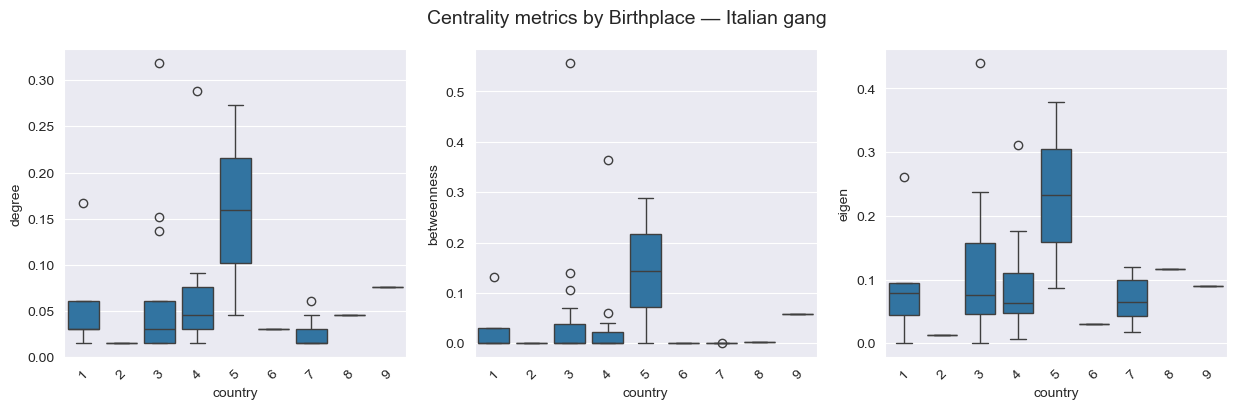

In [37]:
print("\n=== CENTRALITY BY BIRTHPLACE ===")

# Compute basic centrality metrics
degree_c = nx.degree_centrality(G)
bet_c = nx.betweenness_centrality(G)
eig_c = nx.eigenvector_centrality(G)

# Create DataFrame
data = []
for n in G.nodes():
    e = G.nodes[n].get('country', 'Unknown')
    data.append({
        "node": n,
        "country": e,
        "degree": degree_c[n],
        "betweenness": bet_c[n],
        "eigen": eig_c[n]
    })
df_centrality = pd.DataFrame(data)

# Mean centrality by birthplace
mean_cent = df_centrality.groupby("country")[["degree","betweenness","eigen"]].mean().round(3)
print("\nMean centrality by Birthplace:")
display(mean_cent)

# Boxplot visualization
fig, axes = plt.subplots(1, 3, figsize=(15,4))
sns.boxplot(x="country", y="degree", data=df_centrality, ax=axes[0])
sns.boxplot(x="country", y="betweenness", data=df_centrality, ax=axes[1])
sns.boxplot(x="country", y="eigen", data=df_centrality, ax=axes[2])
for ax in axes:
    ax.tick_params(axis='x', rotation=45)
fig.suptitle("Centrality metrics by Birthplace — Italian gang", fontsize=14)
plt.show()

## Community detection and composition

In [38]:
print("\n=== COMMUNITY STRUCTURE AND BIRTHPLACE COMPOSITION ===")

comms = community.greedy_modularity_communities(G)

# Assign community IDs
com_map = {}
for i, c in enumerate(comms):
    for node in c:
        com_map[node] = i
nx.set_node_attributes(G, com_map, "community")

# Build DataFrame
comm_data = []
for n in G.nodes():
    comm_data.append({
        "node": n,
        "community": G.nodes[n]["community"],
        "country": G.nodes[n].get("country", "Unknown")
    })
df_comm = pd.DataFrame(comm_data)

# Composition of each community
comp = df_comm.groupby(["community", "country"]).size().unstack(fill_value=0)
comp["total"] = comp.sum(axis=1)
comp = comp.div(comp["total"], axis=0).drop(columns="total")
print("Community composition by Birthplace:")
display(comp.round(2))

# Shannon diversity index per community
def shannon(row):
    p = row[row>0]
    return -np.sum(p * np.log(p))
comp["diversity_index"] = comp.apply(shannon, axis=1)
print(f"\nMean community diversity (Shannon index): {comp['diversity_index'].mean():.3f}")


=== COMMUNITY STRUCTURE AND BIRTHPLACE COMPOSITION ===
Community composition by Birthplace:


country,1,2,3,4,5,6,7,8,9
community,,,,,,,,,
0,0.00,0.00,0.09,0.74,0.00,0.04,0.13,0.00,0.00
1,0.11,0.00,0.33,0.06,0.00,0.00,0.44,0.06,0.00
2,0.12,0.00,0.29,0.06,0.06,0.00,0.47,0.00,0.00
3,0.00,0.14,0.14,0.29,0.14,0.00,0.14,0.00,0.14
4,0.50,0.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00



Mean community diversity (Shannon index): 1.174


## Inter-group connections

In [39]:
attrs = nx.get_node_attributes(G, "country")
edges_list = G.edges()
inter_edges = [(u,v) for u,v in edges_list if attrs.get(u)!=attrs.get(v)]
pct_inter = len(inter_edges)/len(edges_list)

print(f"\nInter-group (cross-Birthplace) edges: {len(inter_edges)} / {len(edges_list)} ({pct_inter*100:.2f}%)")


Inter-group (cross-Birthplace) edges: 74 / 114 (64.91%)


## Subgraphs by birthplace

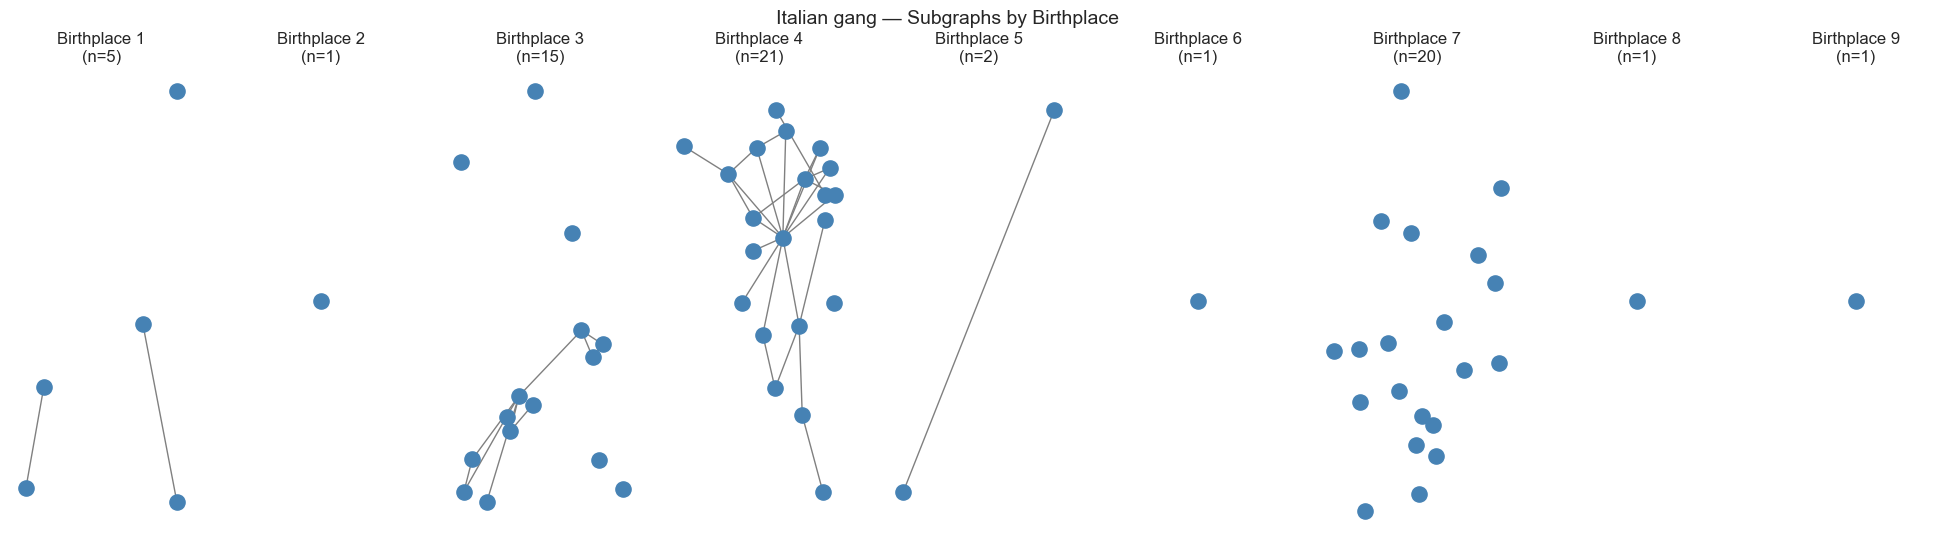

,Country,Nodes,Edges,Density,Clustering
0,1,5,2,0.200,0.000
1,2,1,0,0.000,0.000
2,3,15,11,0.105,0.156
3,4,21,26,0.124,0.294
4,5,2,1,1.000,0.000
5,6,1,0,0.000,0.000
6,7,20,0,0.000,0.000
7,8,1,0,0.000,0.000
8,9,1,0,0.000,0.000


In [40]:
birthplaces = nx.get_node_attributes(G, "country")
unique_bp = sorted(set(birthplaces.values()))

pos = nx.spring_layout(G, seed=42, k=0.4)

fig, axes = plt.subplots(1, len(unique_bp), figsize=(25, 6))
if len(unique_bp) == 1:
    axes = [axes]

for ax, bp in zip(axes, unique_bp):
    nodes_bp = [n for n, attr in birthplaces.items() if attr == bp]
    subG = G.subgraph(nodes_bp)
    nx.draw(subG, pos={n: pos[n] for n in subG.nodes()},
            node_color="steelblue", edge_color="gray",
            node_size=120, with_labels=False, ax=ax)
    ax.set_title(f"Birthplace {bp}\n(n={subG.number_of_nodes()})")
plt.suptitle("Italian gang — Subgraphs by Birthplace", fontsize=14)
plt.show()

summary_bp = []
for bp in unique_bp:
    nodes_bp = [n for n, attr in birthplaces.items() if attr == bp]
    subG = G.subgraph(nodes_bp)
    summary_bp.append({
        "Country": bp,
        "Nodes": subG.number_of_nodes(),
        "Edges": subG.number_of_edges(),
        "Density": nx.density(subG),
        "Clustering": nx.average_clustering(subG) if subG.number_of_nodes() > 1 else 0
    })

df_summary_bp = pd.DataFrame(summary_bp)
display(df_summary_bp.round(3))